Tutorial - Part #4 - Image Subtraction
=====================

For image subtraction the package has a module called `propersubtract`, which implements a main `diff` function.


In [7]:
from copy import copy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

%matplotlib inline

In [8]:
from astropy.visualization import LinearStretch, LogStretch
from astropy.visualization import ZScaleInterval, MinMaxInterval
from astropy.visualization import ImageNormalize

In [9]:
palette = copy(plt.cm.gray)
palette.set_bad('r', 1.0)
#palette.set_under('r', 1.0)
#palette.set_over('r', 1.0)

In [10]:
import properimage.single_image as si
import properimage.propersubtract as ps

using pyfftw interfaces API


In [11]:
ref_path = './../../../data/aligned_eso085-030-004.fit'
new_path = './../../../data/aligned_eso085-030-005.fit'

To get the subtraction we need to run this function by using both paths for example:

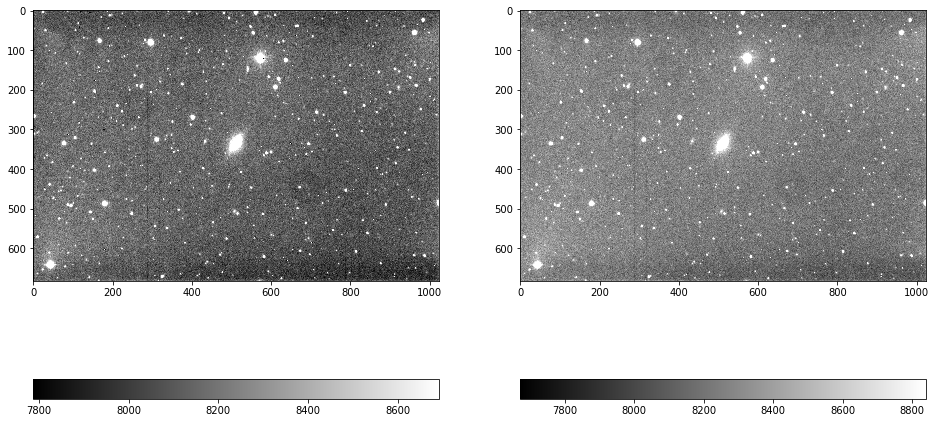

In [12]:
from astropy.io.fits import getdata

plt.figure(figsize=(16, 12))
plt.subplot(121)
ref = getdata(ref_path)
norm = ImageNormalize(ref, interval=ZScaleInterval(),
                      stretch=LinearStretch())

plt.imshow(ref, cmap=plt.cm.gray, norm=norm, interpolation='none')

plt.colorbar(orientation='horizontal')

plt.subplot(122)
ref = getdata(new_path)
norm = ImageNormalize(ref, interval=ZScaleInterval(),
                      stretch=LinearStretch())

plt.imshow(ref, cmap=plt.cm.gray, norm=norm, interpolation='none')

plt.colorbar(orientation='horizontal')

In [13]:
result = ps.diff(ref=ref_path, new=new_path, smooth_psf=False, fitted_psf=True,
                 align=False, iterative=False, beta=False, shift=False)

using single psf, gaussian modeled
Sources found = 84
stamps will be 15 x 15
Sources found = 83
stamps will be 15 x 15
(83, 83, 84)
Matching result::  IDs > 0. => 80
p=2, q=81
[8.41596204 8.42189838]
('Masked pixels: ', 175)


/home/bruno/.virtualenvs/iPTF/local/lib/python2.7/site-packages/astropy/convolution/convolve.py:673: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  bigarray[arrayslices] = array
/home/bruno/.virtualenvs/iPTF/local/lib/python2.7/site-packages/astropy/convolution/convolve.py:679: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  bigkernel[kernslices] = normalized_kernel
/home/bruno/.virtualenvs/iPTF/local/lib/python2.7/site-packages/astropy/convolution/convolve.py:695: FutureWarning: Using a non-tuple sequence for multidimensional indexing is de

updating stamp shape to (21,21)
('Masked pixels: ', 180)


/home/bruno/.virtualenvs/iPTF/local/lib/python2.7/site-packages/astropy/convolution/convolve.py:723: RuntimeWarning: divide by zero encountered in true_divide
  rifft = (ifftn(fftmult)) / bigimwt


updating stamp shape to (21,21)
S_corr sigma_clipped_stats 
mean = -3.68631914208e-06, median = -3.79248554455e-06, std = 0.000122182098306

Subtraction performed in 70.1291060448 seconds




The result is a list of numpy arrays.

The arrays are in order: `D, P, Scorr, mask`

In [14]:
D = result[0]
P = result[1]
Scorr = result[2]
mask = result[3]

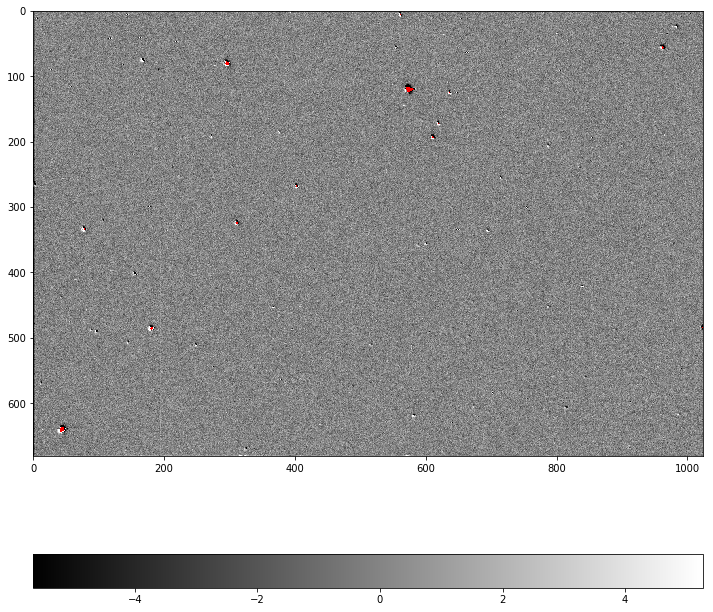

In [15]:
norm = ImageNormalize(D.real, interval=ZScaleInterval(),
                      stretch=LinearStretch())

plt.figure(figsize=(12, 12))
plt.imshow(np.ma.MaskedArray(D.real, mask=mask), 
           cmap=palette, norm=norm, interpolation='none')

plt.colorbar(orientation='horizontal')

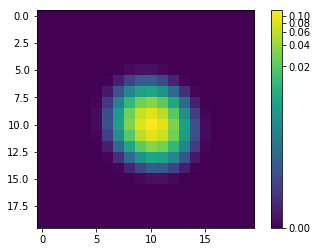

In [16]:
norm = ImageNormalize(P, interval=MinMaxInterval(),
                      stretch=LogStretch())
xc, yc = np.where(P==P.max())
xc, yc = np.round(xc[0]), np.round(yc[0])
plt.imshow(P[xc-10:xc+10, yc-10:yc+10], norm=norm,
           cmap='viridis', interpolation='none')
plt.colorbar()

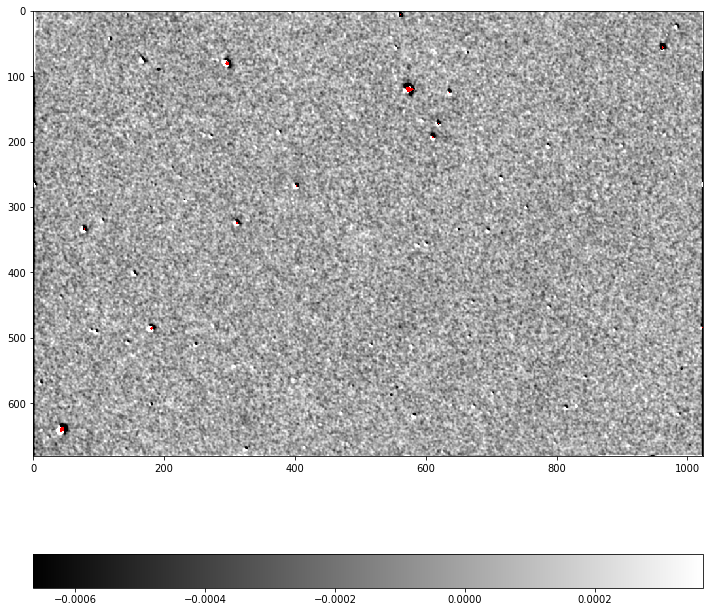

In [17]:
norm = ImageNormalize(Scorr.real, interval=ZScaleInterval(),
                      stretch=LinearStretch())

plt.figure(figsize=(12, 12))
plt.imshow(np.ma.MaskedArray(Scorr.real, mask=mask), 
           cmap=palette, norm=norm, interpolation='none')

plt.colorbar(orientation='horizontal')

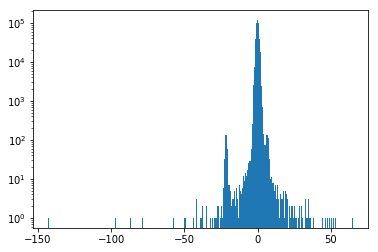

In [18]:
plt.hist(np.ma.MaskedArray(D.real, mask=mask).filled(0).flatten(), log=True, bins=500)
#plt.xlim(-10, 10)
plt.show()

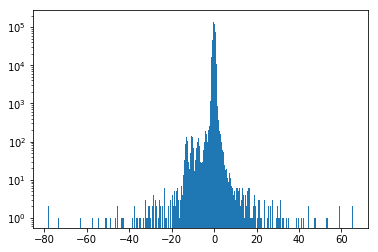

In [19]:
simage = np.ma.MaskedArray(Scorr.real, mask=mask).filled(0).flatten()
plt.hist(simage/np.std(simage), log=True, bins=500)
#plt.xlim(-4, 4)
plt.show()

This is related to the quantities derived in Zackay et al. works. 
$S_{corr} = P_D \otimes D$

In [20]:
D, P, Scorr, mask = ps.diff(ref=ref_path, new=new_path,
                            align=False, iterative=False, beta=True)

using single psf, gaussian modeled
Sources found = 84
stamps will be 15 x 15
Sources found = 83
stamps will be 15 x 15
(83, 83, 84)
Matching result::  IDs > 0. => 80
p=2, q=81
[8.41596204 8.42189838]
('Masked pixels: ', 175)
updating stamp shape to (21,21)
('Masked pixels: ', 180)
updating stamp shape to (21,21)
Found that beta = [ 1.16004503  0.06330602 -0.0538424 ]
Took only 231.173732042 awesome seconds
The solution was with cost 2.10822319711e+14
S_corr sigma_clipped_stats 
mean = -1.36924696171e-05, median = -1.0451251279e-05, std = 0.000138437908154

Subtraction performed in 253.561470032 seconds




The result is a list of numpy arrays.

The arrays are in order: `D, P, Scorr, mask`

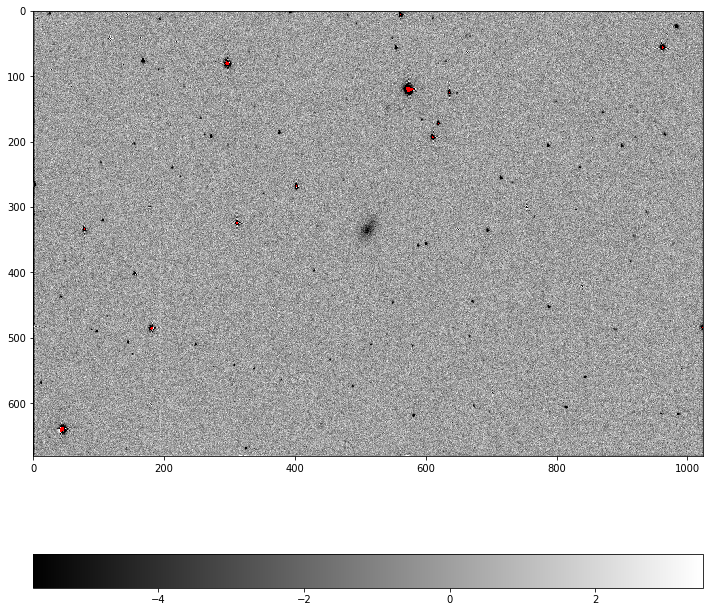

In [21]:
norm = ImageNormalize(D.real, interval=ZScaleInterval(),
                      stretch=LinearStretch())

plt.figure(figsize=(12, 12))
plt.imshow(np.ma.MaskedArray(D.real, mask=mask), 
           cmap=palette, norm=norm, interpolation='none')
plt.colorbar(orientation='horizontal')

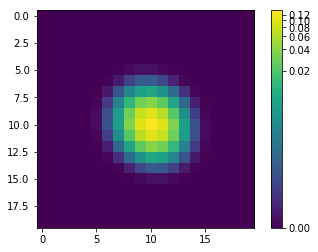

In [22]:
norm = ImageNormalize(P, interval=MinMaxInterval(),
                      stretch=LogStretch())
xc, yc = np.where(P==P.max())
xc, yc = np.round(xc[0]), np.round(yc[0])
plt.imshow(P[xc-10:xc+10, yc-10:yc+10], norm=norm,
           cmap='viridis', interpolation='none')
plt.colorbar()

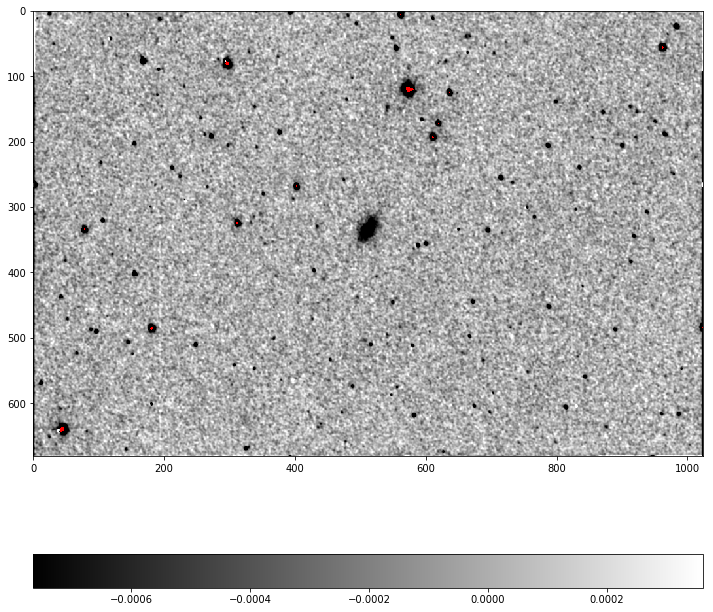

In [23]:
norm = ImageNormalize(Scorr.real, interval=ZScaleInterval(),
                      stretch=LinearStretch())

plt.figure(figsize=(12, 12))
plt.imshow(np.ma.MaskedArray(Scorr.real, mask=mask), 
           cmap=palette, norm=norm, interpolation='none')

plt.colorbar(orientation='horizontal')

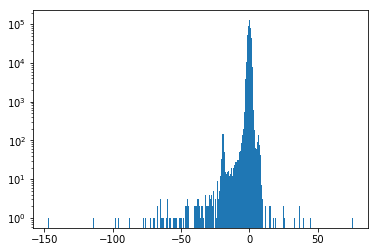

In [24]:
plt.hist(np.ma.MaskedArray(D.real, mask=mask).filled(0).flatten(), log=True, bins=500)
#plt.xlim(-10, 10)
plt.show()

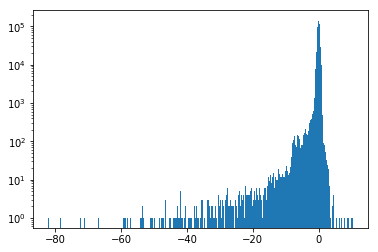

In [25]:
simage = np.ma.MaskedArray(Scorr.real, mask=mask).filled(0).flatten()
plt.hist(simage/np.std(simage), log=True, bins=500)
#plt.xlim(-4, 4)
plt.show()

We have the option of using the iterative methods without beta

In [26]:
D, P, Scorr, mask = ps.diff(ref=ref_path, new=new_path, align=False, iterative=True, beta=False)

using single psf, gaussian modeled
Sources found = 84
stamps will be 15 x 15
Sources found = 83
stamps will be 15 x 15
(83, 83, 84)
Matching result::  IDs > 0. => 80
p=2, q=81
[8.41596204 8.42189838]
('Masked pixels: ', 175)
updating stamp shape to (21,21)
('Masked pixels: ', 180)
updating stamp shape to (21,21)
S_corr sigma_clipped_stats 
mean = -3.68631914208e-06, median = -3.79248554455e-06, std = 0.000122182098306

Subtraction performed in 23.2449450493 seconds




The result is a list of numpy arrays.

The arrays are in order: `D, P, Scorr, mask`

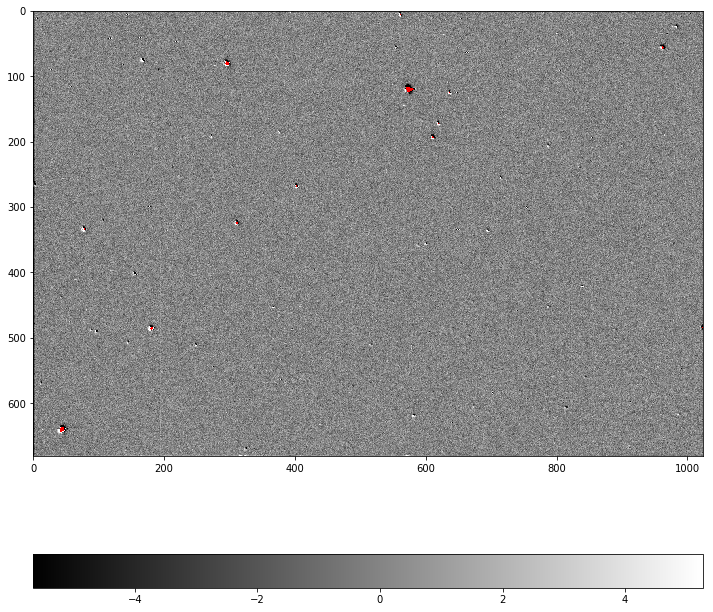

In [27]:
norm = ImageNormalize(D.real, interval=ZScaleInterval(),
                      stretch=LinearStretch())

plt.figure(figsize=(12, 12))
plt.imshow(np.ma.MaskedArray(D.real, mask=mask), 
           cmap=palette, norm=norm, interpolation='none')
plt.colorbar(orientation='horizontal')

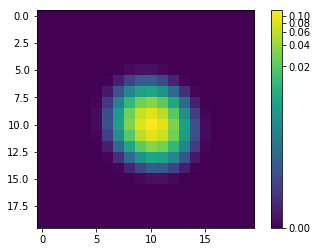

In [28]:
norm = ImageNormalize(P, interval=MinMaxInterval(),
                      stretch=LogStretch())
xc, yc = np.where(P==P.max())
xc, yc = np.round(xc[0]), np.round(yc[0])
plt.imshow(P[xc-10:xc+10, yc-10:yc+10], norm=norm,
           cmap='viridis', interpolation='none')
plt.colorbar()

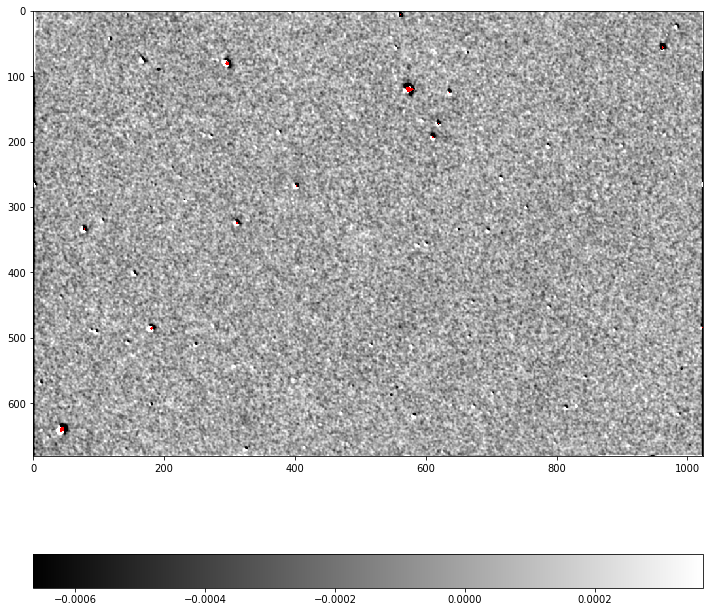

In [29]:
norm = ImageNormalize(Scorr.real, interval=ZScaleInterval(),
                      stretch=LinearStretch())

plt.figure(figsize=(12, 12))
plt.imshow(np.ma.MaskedArray(Scorr.real, mask=mask), 
           cmap=palette, norm=norm, interpolation='none')

plt.colorbar(orientation='horizontal')

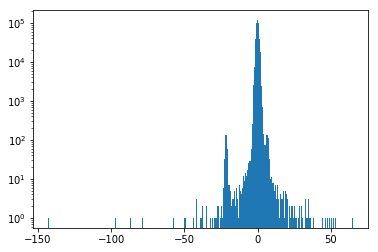

In [30]:
plt.hist(np.ma.MaskedArray(D.real, mask=mask).filled(0).flatten(), log=True, bins=500)
#plt.xlim(-10, 10)
plt.show()

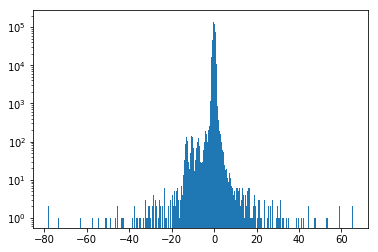

In [31]:
simage = np.ma.MaskedArray(Scorr.real, mask=mask).filled(0).flatten()
plt.hist(simage/np.std(simage), log=True, bins=500)
#plt.xlim(-4, 4)
plt.show()

We have the option of using the iterative methods without beta

In [32]:
D, P, Scorr, mask = ps.diff(ref=ref_path, new=new_path, smooth_psf=False, fitted_psf=True,
                            align=False, iterative=True, beta=True, shift=True)

using single psf, gaussian modeled
Sources found = 84
stamps will be 15 x 15
Sources found = 83
stamps will be 15 x 15
(83, 83, 84)
Matching result::  IDs > 0. => 80
p=2, q=81
[8.41596204 8.42189838]
('Masked pixels: ', 175)
updating stamp shape to (21,21)
('Masked pixels: ', 180)
updating stamp shape to (21,21)
Found that beta = [ 1.16004503  0.06330602 -0.0538424 ]
Took only 226.643862963 awesome seconds
The solution was with cost 2.10822319711e+14
S_corr sigma_clipped_stats 
mean = -1.36924696171e-05, median = -1.0451251279e-05, std = 0.000138437908154

Subtraction performed in 246.012866974 seconds




The result is a list of numpy arrays.

The arrays are in order: `D, P, Scorr, mask`

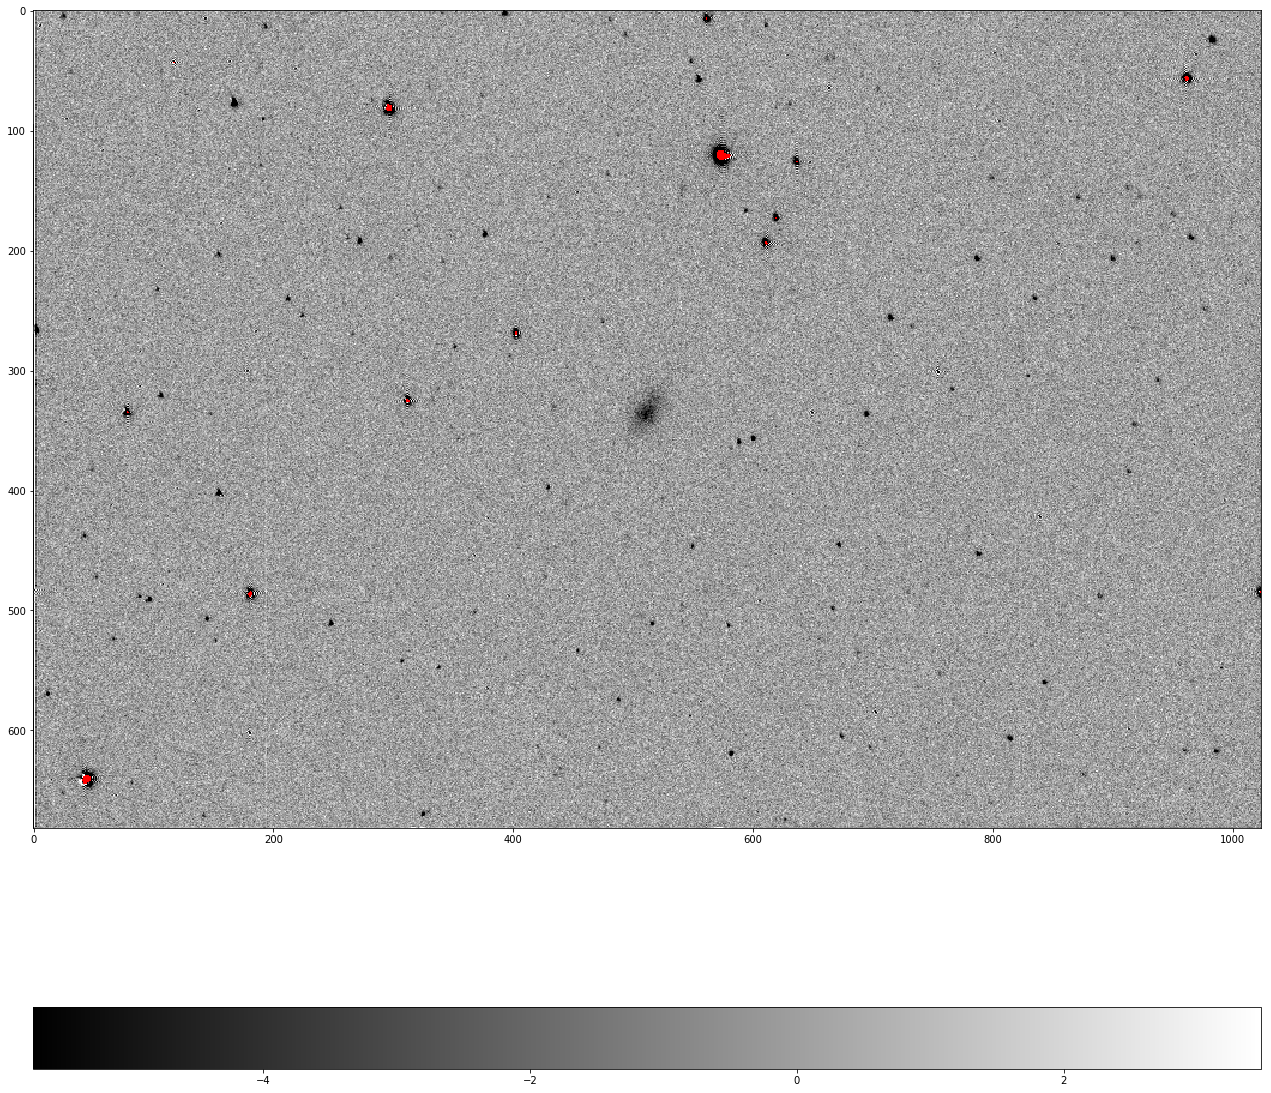

In [33]:
norm = ImageNormalize(D.real, interval=ZScaleInterval(),
                      stretch=LinearStretch())

plt.figure(figsize=(22, 22))
plt.imshow(np.ma.MaskedArray(D.real, mask=mask), 
           cmap=palette, norm=norm, interpolation='none')
plt.colorbar(orientation='horizontal')

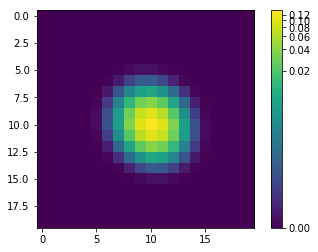

In [34]:
norm = ImageNormalize(P, interval=MinMaxInterval(),
                      stretch=LogStretch())
xc, yc = np.where(P==P.max())
xc, yc = np.round(xc[0]), np.round(yc[0])
plt.imshow(P[xc-10:xc+10, yc-10:yc+10], norm=norm,
           cmap='viridis', interpolation='none')
plt.colorbar()

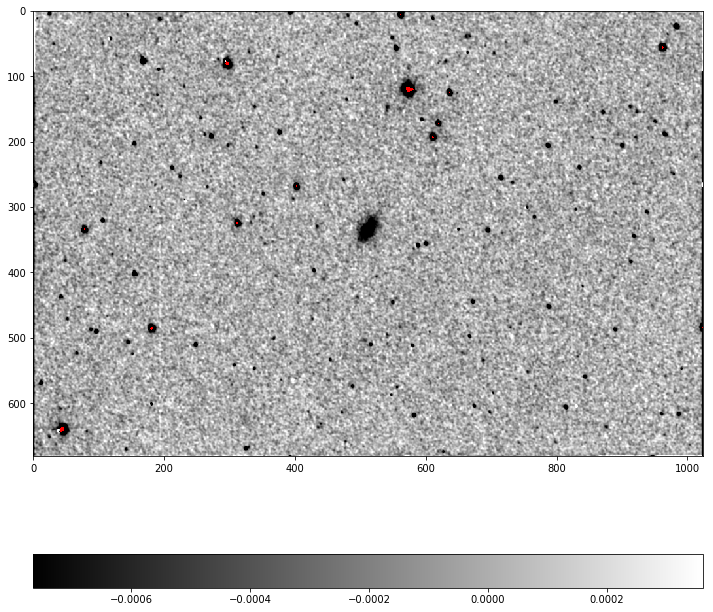

In [35]:
norm = ImageNormalize(Scorr.real, interval=ZScaleInterval(),
                      stretch=LinearStretch())

plt.figure(figsize=(12, 12))
plt.imshow(np.ma.MaskedArray(Scorr.real, mask=mask), 
           cmap=palette, norm=norm, interpolation='none')

plt.colorbar(orientation='horizontal')

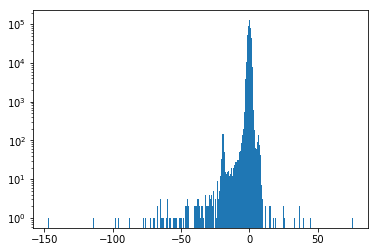

In [36]:
plt.hist(np.ma.MaskedArray(D.real, mask=mask).filled(0).flatten(), log=True, bins=500)
#plt.xlim(-10, 10)
plt.show()

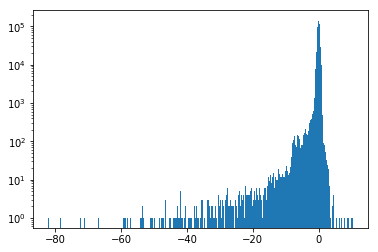

In [37]:
simage = np.ma.MaskedArray(Scorr.real, mask=mask).filled(0).flatten()
plt.hist(simage/np.std(simage), log=True, bins=500)
#plt.xlim(-10, 4)
plt.show()